In [129]:
import numpy as np
import pandas as pd
df=pd.read_csv("DATA-FINAL.csv")


In [130]:
data=df[df['MHRDName']=="Bachelor of Technology (Electrical and Electronics Engineering)"]


In [131]:
#print(data['MHRDName'])


In [132]:
print(data.shape)

(981, 22)


In [133]:
data=pd.DataFrame(data)
#data

In [134]:
print(data.isnull().sum())

Termid           0
Regd No          0
Course           0
Grade            0
CA_100          30
MTT_50         362
ETT_100        312
ETP_100        669
Course_Att      81
MHRDName         0
CA_1            30
CA_2            30
CA_3            30
CA_4            30
Height           0
Weight           0
ScholarType      0
Direction        0
Gender           0
Medium           0
CourseType       0
ProgramType      0
dtype: int64


In [135]:
print(data.describe())

              Termid       Regd No      CA_100      MTT_50     ETT_100  \
count     981.000000  9.810000e+02  951.000000  619.000000  669.000000   
mean   266510.042813  8.211999e+06   61.891693   24.352181   49.994021   
std     86718.667638  4.289843e+06   20.324210   11.195326   22.645669   
min    118192.000000  1.107776e+06    0.000000    0.000000    0.000000   
25%    218192.000000  4.865776e+06   52.000000   18.000000   38.000000   
50%    218192.000000  8.512776e+06   65.000000   25.000000   53.000000   
75%    318192.000000  1.199078e+07   76.000000   32.000000   67.000000   
max    418192.000000  1.524578e+07  100.000000   49.000000   93.000000   

          ETP_100  Course_Att        CA_1        CA_2        CA_3        CA_4  \
count  312.000000  900.000000  951.000000  951.000000  951.000000  951.000000   
mean    67.544872   83.326667   30.533123   15.524711    7.878023    7.955836   
std     19.402769   14.459947   21.817104   15.819214   10.426780   10.358223   
min      

In [136]:
cols1=data._get_numeric_data().columns
cols2=df.columns

c1=['Termid', 'Regd No', 'CA_100', 'MTT_50', 'ETT_100', 'ETP_100',
       'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height', 'Weight']
c2=['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType']
      
    

In [137]:
print(c1,cols2)

['Termid', 'Regd No', 'CA_100', 'MTT_50', 'ETT_100', 'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height', 'Weight'] Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')


In [138]:
category_clos1=['']
c3=list(set(c2)-set(c1))
print(data[c3].isnull().sum())

MHRDName       0
Grade          0
Medium         0
Gender         0
ScholarType    0
Course         0
ProgramType    0
CourseType     0
Direction      0
dtype: int64


# removing null values

In [139]:
from sklearn.preprocessing import Imputer
im=Imputer(strategy='mean',missing_values=np.nan)
data['CA_100']=im.fit_transform(data[['CA_100']].values)
data['MTT_50']=im.fit_transform(data[['MTT_50']].values)
data['ETT_100']=im.fit_transform(data[['ETT_100']].values)
data['ETP_100']=im.fit_transform(data[['ETP_100']].values)
data['Course_Att']=im.fit_transform(data[['Course_Att']].values)
data['CA_1']=im.fit_transform(data[['CA_1']].values)
data['CA_2']=im.fit_transform(data[['CA_2']].values)
data['CA_3']=im.fit_transform(data[['CA_3']].values)
data['CA_4']=im.fit_transform(data[['CA_4']].values)
print(data.isnull().sum())



Termid         0
Regd No        0
Course         0
Grade          0
CA_100         0
MTT_50         0
ETT_100        0
ETP_100        0
Course_Att     0
MHRDName       0
CA_1           0
CA_2           0
CA_3           0
CA_4           0
Height         0
Weight         0
ScholarType    0
Direction      0
Gender         0
Medium         0
CourseType     0
ProgramType    0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


##

In [140]:
data['Grade'].unique()

array(['C', 'D', 'E', 'A', 'B', 'A+', 'B+', 'O', 'F', 'R', 'I'],
      dtype=object)

In [141]:
grade_map={'O':100,'A+':90,'A':80,'B+':70,'B':60,'C':50,'D':40,'E':30,'F':20,'I':10,'M':0,'R':0}

In [142]:
data['Grade']=data['Grade'].map(grade_map)

In [143]:
#data['Grade']

In [144]:
dd=np.array(pd.DataFrame(data.groupby("Course",as_index=False)['Grade'].mean()))

In [145]:
data1=data

In [146]:
dd

array([['KNF1007', 60.0],
       ['KNF1022', 76.66666666666667],
       ['KNF1081', 100.0],
       ['KNF1082', 78.0],
       ['KNF1083', 76.0],
       ['KNF1093', 52.5],
       ['KNF1094', 76.0],
       ['KNF1131', 70.0],
       ['KNF1148', 80.0],
       ['KNF118', 90.0],
       ['KNF1247', 90.0],
       ['KNF1288', 81.66666666666667],
       ['KNF1289', 87.5],
       ['KNF145', 65.0],
       ['KNF150', 82.5],
       ['KNF153', 72.0],
       ['KNF155', 62.5],
       ['KNF158', 61.36363636363637],
       ['KNF159', 57.5],
       ['KNF1668', 90.0],
       ['KNF1669', 90.0],
       ['KNF1692', 75.0],
       ['KNF1819', 50.0],
       ['KNF1820', 60.0],
       ['KNF1847', 38.333333333333336],
       ['KNF20', 59.26829268292683],
       ['KNF202', 71.25],
       ['KNF21', 50.48780487804878],
       ['KNF22', 53.41463414634146],
       ['KNF23', 57.80487804878049],
       ['KNF238', 92.5],
       ['KNF24', 63.90243902439025],
       ['KNF241', 77.14285714285714],
       ['KNF25', 72.926829268

In [147]:
di={}
for p in dd:
    di[p[0]]=p[1]
di

{'KNF1007': 60.0,
 'KNF1022': 76.66666666666667,
 'KNF1081': 100.0,
 'KNF1082': 78.0,
 'KNF1083': 76.0,
 'KNF1093': 52.5,
 'KNF1094': 76.0,
 'KNF1131': 70.0,
 'KNF1148': 80.0,
 'KNF118': 90.0,
 'KNF1247': 90.0,
 'KNF1288': 81.66666666666667,
 'KNF1289': 87.5,
 'KNF145': 65.0,
 'KNF150': 82.5,
 'KNF153': 72.0,
 'KNF155': 62.5,
 'KNF158': 61.36363636363637,
 'KNF159': 57.5,
 'KNF1668': 90.0,
 'KNF1669': 90.0,
 'KNF1692': 75.0,
 'KNF1819': 50.0,
 'KNF1820': 60.0,
 'KNF1847': 38.333333333333336,
 'KNF20': 59.26829268292683,
 'KNF202': 71.25,
 'KNF21': 50.48780487804878,
 'KNF22': 53.41463414634146,
 'KNF23': 57.80487804878049,
 'KNF238': 92.5,
 'KNF24': 63.90243902439025,
 'KNF241': 77.14285714285714,
 'KNF25': 72.92682926829268,
 'KNF252': 61.42857142857143,
 'KNF253': 75.0,
 'KNF26': 74.63414634146342,
 'KNF267': 86.2,
 'KNF27': 63.90243902439025,
 'KNF28': 66.58536585365853,
 'KNF310': 87.5,
 'KNF311': 95.0,
 'KNF312': 80.0,
 'KNF333': 76.0,
 'KNF334': 76.0,
 'KNF336': 69.0,
 'KNF37': 7

In [148]:
data['Strength']=data['Course'].map(di)

In [155]:
target=[]
for st in data['Strength']:
    if st>=80:
        target.append(0)
    elif st>=65:
        target.append(1)
    else:
        target.append(2)
target

[2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,


In [156]:
data['Strength']

18       59.268293
19       50.487805
20       53.414634
21       57.804878
22       63.902439
23       72.926829
24       74.634146
25       63.902439
26       66.585366
539      59.268293
540      50.487805
541      53.414634
542      57.804878
543      63.902439
544      72.926829
545      74.634146
546      63.902439
547      66.585366
548      76.000000
549      76.000000
990      72.000000
991      62.500000
992      61.363636
993      54.047619
994      67.500000
995      56.136364
996      66.136364
997      71.250000
998      54.772727
1344     59.268293
           ...    
62290    66.585366
62406    87.500000
62407    65.000000
62408    75.000000
62409    87.500000
62410    95.000000
62411    80.000000
62412    82.500000
62413    67.500000
63381    59.268293
63382    50.487805
63383    53.414634
63384    57.804878
63385    63.902439
63386    72.926829
63387    74.634146
63388    63.902439
63389    66.585366
64162    76.000000
64163    76.000000
64164    86.200000
64285    86.

In [164]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Course']=le.fit_transform(data['Course'])

In [165]:
X

,MTT_50,ETT_100,CA_100,Course,Strength
18,15.000000,36.000000,57.000000,KNF20,59.268293
19,32.000000,30.000000,40.000000,KNF21,50.487805
20,14.000000,6.000000,72.000000,KNF22,53.414634
21,30.000000,36.000000,60.000000,KNF23,57.804878
22,24.352181,49.994021,55.000000,KNF24,63.902439
23,24.352181,49.994021,82.000000,KNF25,72.926829
24,25.000000,19.000000,50.000000,KNF26,74.634146
25,22.000000,43.000000,52.000000,KNF27,63.902439
26,25.000000,63.000000,47.000000,KNF28,66.585366
539,35.000000,80.000000,90.000000,KNF20,59.268293


In [166]:
li=['MTT_50','ETT_100','CA_100','Course','Strength']
X=data[li]

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,target,test_size=0.25)


# Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8699186991869918

# SVM

In [174]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1,random_state=0)
svm.fit(x_train,y_train)
y1_pred=svm.predict(x_test)

In [176]:
accuracy_score(y1_pred,y_test)

1.0

# Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
GaussianNB(priors=None)
clf.fit(x_train,y_train)
y2_pred=clf.predict(x_test)

In [178]:
accuracy_score(y2_pred,y_test)

0.9471544715447154

# DecisionTreeClassifier

In [179]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y3_pred=dt.predict(x_test)

In [180]:
accuracy_score(y3_pred,y_test)

1.0

In [197]:
len(np.array(X)[:,3])

981

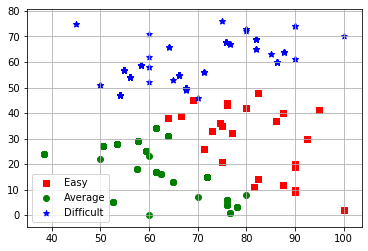

In [194]:
pp=np.array(X)
plt.scatter(pp[y_km==0,4],pp[y_km==0,3],c='red',marker='s',label='Easy')
plt.scatter(pp[y_km==1,4],pp[y_km==1,3],c='green',marker='o',label='Average')
plt.scatter(pp[y_km==2,4],pp[y_km==2,3],c='blue',marker='*',label='Difficult')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
cols1=data._get_numeric_data().columns
cols2=df.columns
c1=['Termid', 'Regd No', 'CA_100', 'MTT_50', 'ETT_100', 'ETP_100',
       'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height', 'Weight']
c2=['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType']

In [ ]:
X=data[['Course','Strength']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Course']=le.fit_transform(X['Course'])

In [ ]:
print(np.array(X)[:,1],np.array(X)[:,0])

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(np.array(X)[:,1],np.array(X)[:,0],marker='o')
plt.grid()
plt.show()

In [ ]:
target=['Course','Strength','CA_100', 'MTT_50', 'ETT_100', 'ETP_100']
X=data[target]
X
    

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split()

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1,random_state=0)
y_sv=svm.fit_predict(X)



In [ ]:
d=[]
d=pd.DataFrame(d)
d['Sample']=y_km

In [ ]:
d['Sample'].unique()

In [ ]:
X.head(10)

In [ ]:
for i in range(10):
    print(y_km[i])